# Ch 4 - Inferential Statistics

In Tuesday's class you had learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Excercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import math

''' we will be using seaborn , scipy stat norm '''
import seaborn as sns
from scipy import stats
from scipy.stats import norm

### Importing the datafiles

For importing the files as with multiple sheet in excel workbook, in Python 3.0, could use `pd.read_excel()`.

For example, if workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use `pd.read_excel('workbook.xlsx', 'Sheet1')` or  `('workbook.xlsx', 'Sheet2')`. 

* Now, try importing csv file present inside the zip file named-'avocado' directly (make use of 'zipfile').
* https://docs.python.org/3/library/zipfile.html

In [4]:
# Cell only needs to be run once to load the CSV to the local storage.
#from google.colab import files

#uploaded = files.upload()
uploaded = pd.read_csv(r'C:\Users\Hunter Chambers\Documents\School\Intro To DS\Lab2\avocado.zip')

In [5]:
# Example code of how to load in data stored within a zip-file
import zipfile
zf = zipfile.ZipFile('avocado.zip')
avacado = pd.read_csv(zf.open('avocado.csv'))
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# Get to know your system versions
import sys
print ('Python version:', sys.version, '\n')
print ('Pandas version:', np.__version__ , '\n')
print('Seaborn version: ', sns.__version__, '\n')

Python version: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:43:08) [MSC v.1926 32 bit (Intel)] 

Pandas version: 1.19.2 

Seaborn version:  0.11.0 



In [7]:
# Load wine data 
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Inferential Statistics

The below piece of code is adapted from `nb.week3.ipynb` class material. A histogram function is invoked for sampled mean (with 5 random samples taken around 1000 times and mean was computed for it and stored in an array). 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?

mean pH, mu = 3.3111131957473416


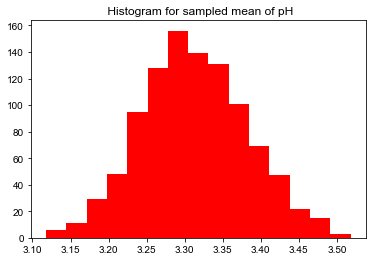

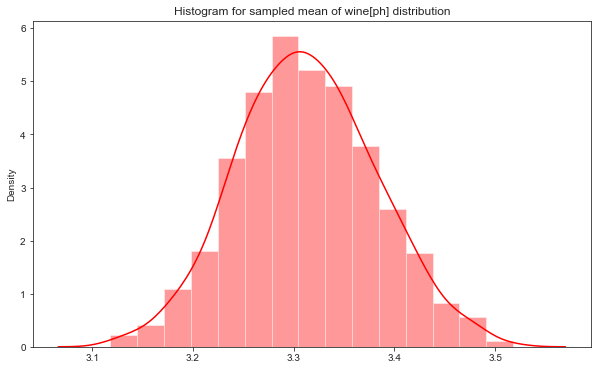

In [8]:
'''The piece of code from nb.week3.ipynb is provided, use it to  
compute the mean for N-test times the samples of random 'n' 
and store as an array in means[i]'''

mu = wine["pH"].mean()                                            # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                                     # No of test to perform
n = 5                                                              # random sampling
means = [0] * N_tests

for i in range(N_tests):
    observations = np.random.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    
    
nbins = 15
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')


sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(means, bins=nbins, color ='red')
plt.title('Histogram for sampled mean of wine[ph] distribution')

plt.show()

### Central Limit Theorem

From Chap 4, we had a chance to look into Central Limit Theorem. The initial population distribution was not observed in the class and the mean sampled distribution, i.e., mean of `wine['pH']`, evidently displayed normal distribution (see the plots above).



### Exercise 1

Check what was the distribution of the initial population ? Observe the  Histogram and discuss.

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot  
*Note* in future versions of seaborn `distplot` will be deprecated and will need to be replaced with `histplot`

(array([  1.,   9.,  19.,  64., 174., 257., 380., 342., 185., 105.,  37.,
         19.,   2.,   3.,   2.]),
 array([2.74      , 2.82466667, 2.90933333, 2.994     , 3.07866667,
        3.16333333, 3.248     , 3.33266667, 3.41733333, 3.502     ,
        3.58666667, 3.67133333, 3.756     , 3.84066667, 3.92533333,
        4.01      ]),
 <BarContainer object of 15 artists>)

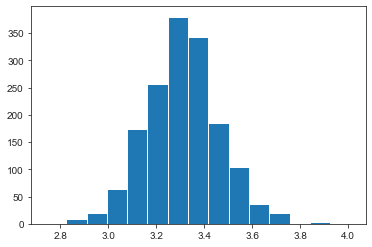

In [9]:
# Plot the distribution of the population itself i.e., wine['pH']. 
#  What kind of distribution are they?
# Try using seaborn rather than matplotlib 

### This is a standard distribution, you can tell because of it's bell shape

ph = wine['pH']
bins = 15
plt.hist(ph, bins=15)
#

Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with Central Limit Theorem?

For options regarding random numbers generation in certain distribution pattern, see the link:
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

What if the initial population is other than normal distribution. Would CLT come into picture? Under what scenarios does CLT property is very evident in the sampled mean?



### Exercise 2 - Uniform distribution

In Exercise 1, the distribution of wine pH values is approximately normal.  What about if this data follows another distribution?  How does it affect the distribution of the sampled means?

Response:  The distribution of the sampled means tends to be fairly similar. This is especially the case as n is larger.

Let's look if the initial data came from a Uniform distribution.

0.4957213561415135
-0.02309659946235403


(array([  1.,   0.,  11.,  44., 157., 549., 187.,  44.,   5.,   2.]),
 array([-8.62662676, -7.06971599, -5.51280522, -3.95589445, -2.39898367,
        -0.8420729 ,  0.71483787,  2.27174864,  3.82865942,  5.38557019,
         6.94248096]),
 <BarContainer object of 10 artists>)

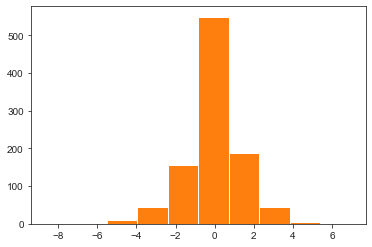

In [59]:
# try with uniform distribution function as well.

# Create a pandas DataSeries - created using random numbers 
#  Sample 1000 numbers from the uniform distribution - unif(0,1) 
# Hint: look at np.random.uniform() function 
s = pd.Series( np.random.uniform(0, 1, 1000) ) 
p = pd.Series( np.random.laplace(0, 1, 1000))
print(s.mean())
print(p.mean())
s.head()

plt.hist(s)
plt.hist(p)



In [11]:
# Use similar approach as above to plot a histogram for the initial population
w = pd.Series(wine['pH'].sample(n=1000))
w.head()



1406    3.22
1395    3.31
116     3.39
1398    3.52
1182    3.38
Name: pH, dtype: float64

mean population, mu = 0.4876649390839279


(array([ 15.,  50., 142., 239., 254., 165.,  96.,  32.,   5.,   2.]),
 array([0.37359461, 0.40075193, 0.42790926, 0.45506658, 0.4822239 ,
        0.50938122, 0.53653854, 0.56369587, 0.59085319, 0.61801051,
        0.64516783]),
 <BarContainer object of 10 artists>)

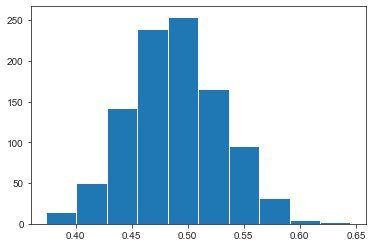

In [12]:
# In this cell, proceed with the collection of samples: compute the mean for 
#   N-test times the samples of random 'n' 

# As a start I have copied the most of the code for pH.  
# Modify it to get the sample mean of the uniformly distributed sample population. 

mu = s.mean()
print("mean population, mu = " + str(mu))

N_tests = 1000
n = 50 
means = [0] * N_tests

for i in range(N_tests):
    observations = np.random.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 10
# Create a histogram of the sampled means from a uniform distribution
plt.hist(means, bins=nbins)



#####  Once the code is up and running. Test the following for better understanding. 
 * How is plot sensitive for 'n' - no of samples drawn from population.
 * How is the profile when 'N_test' - is increased or decreased.

### Exercise 2B - Gamma and Wald distributions

Let's examine this again if the initial data is from a Gamma and Wald distributions. 

Will the Central Limit Theorem agree here as well? 

Response: The central limit theorem does seem to agree here as well. You can see that from the bell shaped histogram below

Read through Chapter 4 for more information.  

mean of random dataset, mu = 4.0295672475106645


(array([ 12.,  30.,  76., 109., 149., 162., 146., 107.,  96.,  43.,  28.,
         16.,  19.,   3.,   4.]),
 array([1.31368791, 1.43617385, 1.55865979, 1.68114573, 1.80363167,
        1.92611762, 2.04860356, 2.1710895 , 2.29357544, 2.41606138,
        2.53854732, 2.66103326, 2.7835192 , 2.90600514, 3.02849108,
        3.15097702]),
 <BarContainer object of 15 artists>)

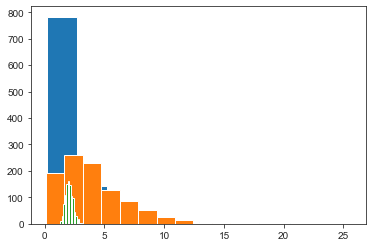

In [24]:
''' Perform the similar operation by testing on the different distribution 
such as  gamma, wald and many more. Refer to the link 
provided earlier to generate the initial samples'''

# To try Wald distribution function
# np.random.wald
w = pd.Series(np.random.wald(2., 2., 1000))

# To try Gamma distribution function
# np.random.gamma
s =  pd.Series(np.random.gamma(2., 2., 1000))



# Histogram plot of initial population
plt.hist(w)
plt.hist(s)


mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests


# Histogram of sampled means 
for i in range(N_tests):
    observations = np.random.choice(w.index.values,n)
    sampled_pop = w.loc[observations]
    means[i] = sampled_pop.mean()
#
nbins = 15
plt.hist(means, bins=nbins)


## Measuring Variability of Estimates

Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  



### Exercise 3 - Confidence Intervals

Refer to section 4.3.1 and 4.3.2 in the textbook and from `nb.week3` notebook. Explain in words (in the below Markdown cell), what is a Confidence Interval ? What does it mean 95% C.I ? 

**Answer here**



* A confidence interval is the interval over which you are as certain as the interval states, that the mean will lie within the interval.


- A 95% confidence interval means that 95% of the sample means that we find should lie within the interval. 

### Example - Confidence Intervals

Spend some time reviewing https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from `nb.week3`. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* Check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

In [ ]:
''' observe the output plot while changing the Confidence level, 
no of samples and no of times the test is performed '''

xbar = sampled_wines["pH"].mean() # some sampled mean. Note, not mean of initial population
sigma = sampled_wines["pH"].std() # some sampled S.D. Note, not s.d. of initial population


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5) , "% confident that the interval = ",  
       ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = np.random.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

### Exercise 4

 Now assume that only the good quality wine is distilled at one of the brewing center. It is known to contain pH greater than and equal to 3.5. The sampled mean by one of the quality inspector was 3.56 for a batch of 15. What is the 95% CI for mean? 

In [25]:
''' Since, we are interested in only a batch which has pH greater than 3.5. 
This becomes our population  of interest '''

n = 15
alpha = 0.05

# Arbitarirly selected.
Xbar = 3.56

# refining data for higher quality wines with pH >= 3.5 
highquality = wine[wine['pH'] >= 3.5]
sigma = highquality['pH'].std()


observations = np.random.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print('The mean is :', mu, '& the Std deviation is:', sigma)


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print ('We are', round(100*confidence,3), "confident that the interval = ", 
       CI , "contains the mean.")

The mean is : 3.5526666666666666 & the Std deviation is: 0.05364788195348669
We are 95.0 confident that the interval =  [3.5328509247067497, 3.5871490752932504] contains the mean.


### Exercise 5

Using `stats.norm.interval()`, CI can be computed.  Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [34]:
mean = 3.56
sd = 0.05364788195348669
samples = 15
CIs = stats.norm.interval(0.95, mean, sd/math.sqrt(samples))
print ('We are', round(100*confidence,3), "confident that the interval = ", 
       CIs , "contains the mean.")

We are 95.0 confident that the interval =  (3.5328509247067497, 3.5871490752932504) contains the mean.


### Example - t distribution


If number of samples are low, it is better to use the t distribution.

In [35]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 15
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print ('we are', round(100*(1-alpha), 3), '%', "confident that the interval = ", 
       ci , "contains the mean.")



we are 95.0 % confident that the interval =  [15.47571413802033, 21.124285861979672] contains the mean.


### Exercise 6 

We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package - `scipy.stats.t()`

Apply `stats.t.interval()` function here to obatin the 95% CI, the sigma for this is known to be around 5.1. Xbar is 18.3. degree of freedom is same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [39]:
# Use scipy.stats  
from scipy.stats import t
confidence = 0.95
x_bar = 18.3
sigma = 5.1
CIt = stats.t.interval(confidence, x_bar, sigma/math.sqrt(n-1))
print ('we are', round(100*0.95, 3), '%', "confident that the interval = ", 
       CIt , "contains the mean.")


we are 95.0 % confident that the interval =  (-0.735423686046133, 3.4614883535528618) contains the mean.


### Exercise 7 

Calculate the standard error using `scipy.stats.sem()`

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}



In [47]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])

In [48]:
print('S.E from sigma and n is: ', se , 'and S.E from stats is also: ', sef)

S.E from sigma and n is:  0.013851823557677024 and S.E from stats is also:  0.013851823557677024


### Exercise 8 

Now you have worked on stats.normal.interval and stats.t to compute the CI. Try to solve the below questions

 The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 batches and the mean was 3.7. Find the 95% confidence interval for distribution of mean.

In [51]:
# compute the S.E (standard Error) using the formula explained earlier. 

sigma = 2.0
n = 150
mean = 3.7
ci = 0.95

0.95, mean, sd/math.sqrt(samples)
# use norm.interval
CIs = stats.norm.interval( ci, mean, sigma/math.sqrt(n-1) )

# I'm not sure what this is for??
#CIs = stats.t.interval(0.95, 121, loc=3.7, scale=2/np.sqrt(121))

print ('we are', round(100*0.95, 3), "confident that the interval = ", 
       CIs , "contains the mean.")

we are 95.0 confident that the interval =  (3.3436429119018083, 4.056357088098192) contains the mean.


### Extra Exercises 

Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset?
2. Distribution of sampled price?
3. CI for a case. 